In [64]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [65]:
path = r'c:\Users\super\OneDrive\Escritorio\klym_project\data\raw'

In [66]:
car_df = pd.read_csv(path+r'\vehicles.csv')
car_df.head()

region  price    year manufacturer                    model  \
0   palm springs   3400  2002.0   volkswagen                jetta gls   
1          salem   6300  2004.0    chevrolet  silverado 2500 crew cab   
2    long island   9997  2011.0       nissan                   xterra   
3       amarillo  21504  2017.0    chevrolet                   malibu   
4  inland empire  28900  2009.0     cadillac                    cts-v   

   condition    cylinders fuel  odometer title_status  ...                vin  \
0  excellent  4 cylinders  gas  100000.0        clean  ...  WVWSK61J62W209823   
1        NaN  8 cylinders  gas  208942.0        clean  ...  1GCHK23U94F144317   
2  excellent          NaN  gas  125666.0        clean  ...  5N1AN0NWXBC502031   
3        NaN  4 cylinders  gas   24218.0        clean  ...                NaN   
4  excellent  8 cylinders  gas   61000.0        clean  ...                NaN   

  drive      size    type paint_color  \
0   NaN       NaN   wagon         NaN   
1   4wd       NaN  pickup       white   
2   NaN       NaN     NaN         NaN   
3   fwd  mid-size   sedan         red   
4   rwd  mid-size   sedan      silver   

                                         description county  state      lat  \
0  This 2002 Volkswagen Jetta GLS Wagon is simply...    NaN     ca  33.7451   
1  We want to let you know up front that Synergiz...    NaN     or  44.9225   
2  Year : 2011   \t\t  Make : NISSAN   \t\t\tMode...    NaN     ny  40.8004   
3  Use this link to see more information on this ...    NaN     tx  35.1773   
4  2009 CTS-V, FAST! Awesome car, super clean, we...    NaN     ca  33.9748   

       long  
0 -116.3520  
1 -123.3200  
2  -73.0058  
3 -101.7940  
4 -117.5580  

[5 rows x 21 columns]

In [67]:
crashes_df = pd.read_csv(path+r'\crashes_poverty.csv', sep=';')
crashes_df.head()

State  Number of Crashes  Poverty
0     Florida               1011     13.7
1   Tennessee                437     15.2
2  New Mexico                344     18.8
3     Alabama                336     16.8
4   Louisiana                271     18.7

In [68]:
counties_df = pd.read_csv(path+r'\counties.csv', sep=';')
counties_df.head()

State Abbreviation Postal\ncode
0         Alabama         Ala.           AL
1          Alaska       Alaska           AK
2  American Samoa                        AS
3         Arizona        Ariz.           AZ
4        Arkansas         Ark.           AR

In [69]:
print(car_df['price'].quantile(0.5),car_df['price'].quantile(0.25), car_df['price'].quantile(0.75), car_df['price'].max(), car_df['price'].quantile(0.99))
fig= px.histogram(car_df[car_df['price']< car_df['price'].max()], x='price')
fig.show()

car_df = car_df[car_df['price']<car_df['price'].max()]
fig= px.histogram(car_df[car_df['price']< car_df['price'].max()], x='price')
fig.show()


9800.0 4450.0 17900.0 1116080943 50597.080000000016


In [70]:
fig = px.box(car_df, x='price')
fig.show()

In [71]:
car_df[car_df['price']> car_df['price'].quantile(0.99)].shape[0]/car_df.shape[0]
max_val_car = car_df[car_df['price']> car_df['price'].quantile(0.99)]
max_val_car[['price']].describe()

price
count  2.700000e+02
mean   1.858210e+05
std    1.702498e+06
min    5.059500e+04
25%    5.500000e+04
50%    6.195900e+04
75%    7.637375e+04
max    2.800350e+07

In [72]:
car_df.isna().sum()/car_df.shape[0]

region          0.000000
price           0.000000
year            0.001853
manufacturer    0.044244
model           0.015674
condition       0.431467
cylinders       0.418905
fuel            0.006225
odometer        0.185089
title_status    0.005077
transmission    0.008745
vin             0.402861
drive           0.296291
size            0.690740
type            0.265350
paint_color     0.325712
description     0.000111
county          1.000000
state           0.000000
lat             0.013303
long            0.013303
dtype: float64

In [73]:
car_df['vin'].describe()

count                 16115
unique                14808
top       WDZPE7CC9D5767661
freq                     13
Name: vin, dtype: object

In [74]:
car_df['condition'].describe()
car_df['condition'] = car_df['condition'].fillna('NA')
bar_car_df = car_df['condition'].value_counts(normalize=True).reset_index()
bar_car_df

condition  proportion
0         NA    0.431467
1  excellent    0.270352
2       good    0.222292
3   like new    0.056138
4       fair    0.015118
5        new    0.003039
6    salvage    0.001593

In [75]:
fig = px.bar(bar_car_df, x='condition', y='proportion')

fig.show()

In [76]:
fig = px.box(car_df[car_df['price']<car_df['price'].quantile(0.99)], x='condition', y='price')
fig.show()

In [77]:
fig = px.scatter(car_df[car_df['price']<car_df['price'].quantile(0.99)], x='condition', y='price', color='manufacturer')
fig.show()

###### So the condition seems to be not discriminant and additonally the biggest proble is that there is 40% of missing values which makes difficult to impute even values

## Odometer column

In [78]:
fig = px.scatter(car_df[car_df['price']<car_df['price'].quantile(0.99)], x='odometer', y='price')

fig.show()

In [79]:
bins = [-np.inf,0,30000,60000,90000,120000,150000, np.inf]
car_df['odometer'] = car_df['odometer'].fillna(-1)
labels =['no_data','0-30ml', '31-60ml', '61-90ml','91-120ml', '121mil-150mil','+151ml']
car_df['odometer_cat'] = pd.cut(car_df['odometer'],bins=bins,labels=labels)
df_apoyo = car_df['odometer_cat'].value_counts(normalize = True).reset_index()
fig = px.bar(df_apoyo, 'odometer_cat', 'proportion')
fig.show()

In [80]:
fig = px.scatter(car_df[car_df['price']<car_df['price'].quantile(0.99)], x='odometer_cat', y='price', color='year')
fig.show()

###### Odometer sice to have a great relation with price, it is important that there is at least one values which makes no sense but there are few of them that could be drawn for the data set

In [81]:
car_df['odometer'].describe()

count    2.698700e+04
mean     8.059498e+04
std      1.111354e+05
min     -1.000000e+00
25%      1.894150e+04
50%      7.122000e+04
75%      1.244255e+05
max      9.999999e+06
Name: odometer, dtype: float64

In [82]:
fig = px.histogram(car_df, x='odometer')
fig.show()

In [83]:
df_apoyo = car_df.dropna(subset='odometer')
corrspr =stats.spearmanr(df_apoyo['price'], df_apoyo['odometer'])
print(corrspr.pvalue)
corrper = stats.pearsonr(df_apoyo['price'], df_apoyo['odometer'])
print(corrper.pvalue)

1.1220141412840419e-94
0.0413355668737002


In [84]:
car_df[['price', 'odometer']].isna().sum()

price       0
odometer    0
dtype: int64

In [85]:
df_apoyo = car_df.groupby(['condition', 'odometer_cat']).size()
df_apoyo.unstack()


odometer_cat  no_data  0-30ml  31-60ml  61-90ml  91-120ml  121mil-150mil  \
condition                                                                  
NA               2971    1255     1728     1568      1657           1172   
excellent         976     594      878     1158      1352           1140   
fair               93      12        5       15        21             48   
good              701     930     1116      744       655            683   
like new          304     257      252      219       207            152   
new                37      31        3        5         1              1   
salvage            20       3        2        1         2              2   

odometer_cat  +151ml  
condition             
NA              1293  
excellent       1198  
fair             214  
good            1170  
like new         124  
new                4  
salvage           13

### vin column

In [86]:
total_vin = car_df['vin'].drop_duplicates().shape[0]-car_df['vin'].isna().sum()
print(total_vin)
print(len(car_df[~car_df['vin'].isna()]['vin'].unique().tolist()) )
len(car_df[(~car_df['vin'].isna()) ]['vin'].unique().tolist()) == total_vin

3937
14808


False

In [87]:
vin_df = car_df[(car_df.duplicated( keep=False)) & (~car_df['vin'].isna())].sort_values(by='vin')
vin_df

region  price    year manufacturer  \
8676    tampa bay area   5875  1966.0        dodge   
26396   tampa bay area   5875  1966.0        dodge   
11794  fresno / madera  12100  2009.0       toyota   
15219  fresno / madera  12100  2009.0       toyota   
4977           el paso   8995  2015.0     chrysler   
...                ...    ...     ...          ...   
1463   san luis obispo  31995  2017.0        volvo   
693    san luis obispo  31995  2017.0        volvo   
5117   san luis obispo  53995  2017.0        volvo   
20122  san luis obispo  53995  2017.0        volvo   
3633   san luis obispo  53995  2017.0        volvo   

                            model  condition    cylinders    fuel  odometer  \
8676                      dart gt       good  8 cylinders     gas   50000.0   
26396                     dart gt       good  8 cylinders     gas   50000.0   
11794      highlander limited awd  excellent  6 cylinders     gas      -1.0   
15219      highlander limited awd  excellent  6 cylinders     gas      -1.0   
4977                          200       good  4 cylinders     gas   67041.0   
...                           ...        ...          ...     ...       ...   
1463                    certified  excellent          NaN     gas   60104.0   
693                     certified  excellent          NaN     gas   60104.0   
5117   xc90 t8 insciption reduced  excellent          NaN  hybrid   24750.0   
20122  xc90 t8 insciption reduced  excellent          NaN  hybrid   24750.0   
3633   xc90 t8 insciption reduced  excellent          NaN  hybrid   24750.0   

      title_status  ... drive       size         type paint_color  \
8676         clean  ...   rwd        NaN  convertible      yellow   
26396        clean  ...   rwd        NaN  convertible      yellow   
11794        clean  ...   4wd  full-size          SUV      silver   
15219        clean  ...   4wd  full-size          SUV      silver   
4977       rebuilt  ...   fwd        NaN        sedan        grey   
...            ...  ...   ...        ...          ...         ...   
1463         clean  ...   4wd        NaN          SUV         NaN   
693          clean  ...   4wd        NaN          SUV         NaN   
5117         clean  ...   4wd        NaN          SUV         NaN   
20122        clean  ...   4wd        NaN          SUV         NaN   
3633         clean  ...   4wd        NaN          SUV         NaN   

                                             description county state  \
8676   He we have a lovely Dodge Dart GT Convertible ...    NaN    fl   
26396  He we have a lovely Dodge Dart GT Convertible ...    NaN    fl   
11794  Ready for any destination!!!! Coast , Mountain...    NaN    ca   
15219  Ready for any destination!!!! Coast , Mountain...    NaN    ca   
4977   OR-BEST-CASH-OFFER! O-MEJOR-OFERTA-CASH! We-Wa...    NaN    tx   
...                                                  ...    ...   ...   
1463   2017 *** Volvo XC90 VOLVO CERTIFIED T6 AWD 7-P...    NaN    ca   
693    2017 *** Volvo XC90 VOLVO CERTIFIED T6 AWD 7-P...    NaN    ca   
5117   2017 *** Volvo XC90 T8 INSCIPTION REDUCED SUV ...    NaN    ca   
20122  2017 *** Volvo XC90 T8 INSCIPTION REDUCED SUV ...    NaN    ca   
3633   2017 *** Volvo XC90 T8 INSCIPTION REDUCED SUV ...    NaN    ca   

           lat      long  odometer_cat  
8676   27.9948  -82.3745       31-60ml  
26396  27.9948  -82.3745       31-60ml  
11794  36.7704 -119.7000       no_data  
15219  36.7704 -119.7000       no_data  
4977   31.8016 -106.3040       61-90ml  
...        ...       ...           ...  
1463   35.2834 -120.6580       61-90ml  
693    35.2834 -120.6580       61-90ml  
5117   35.2834 -120.6580        0-30ml  
20122  35.2834 -120.6580        0-30ml  
3633   35.2834 -120.6580        0-30ml  

[200 rows x 22 columns]

###### vin is not a great variable to incluiding to the model, besides there is a 43% of missing values also vin is a unique characteristic for every car son there will no get any info it is totally rejected

#### Other varibles and transformations

In [88]:
car_df = car_df.reset_index(drop=True)

In [89]:
car_df.isna().sum()/car_df.shape[0]

region          0.000000
price           0.000000
year            0.001853
manufacturer    0.044244
model           0.015674
condition       0.000000
cylinders       0.418905
fuel            0.006225
odometer        0.000000
title_status    0.005077
transmission    0.008745
vin             0.402861
drive           0.296291
size            0.690740
type            0.265350
paint_color     0.325712
description     0.000111
county          1.000000
state           0.000000
lat             0.013303
long            0.013303
odometer_cat    0.000000
dtype: float64

In [90]:
def fill_mode(group):
    mode_values = group.mode()
    if not mode_values.empty:
        return group.fillna(mode_values.iloc[0])
    else:
        return group

car_df['cylinders'] = car_df.groupby(['manufacturer', 'model'])['cylinders'].transform(fill_mode)



In [91]:
car_df['cylinders'].isna().sum()/car_df.shape[0]

0.15818727535480046

In [92]:
car_df['drive'] = car_df.groupby(['manufacturer', 'model'])['drive'].transform(fill_mode)


In [93]:
car_df['drive'].isna().sum()/car_df.shape[0]

0.11201689702449327

In [94]:
car_df['type'] = car_df.groupby(['manufacturer', 'model'])['type'].transform(fill_mode)


In [95]:
car_df['drive'].isna().sum()/car_df.shape[0]

0.11201689702449327

In [96]:
car_df['size'] = car_df.groupby(['manufacturer', 'model'])['size'].transform(fill_mode)
car_df['size'].isna().sum()/car_df.shape[0]


0.26275614184607404

In [97]:
df_apoyo = car_df['title_status'].value_counts(normalize=True).reset_index()
fig = px.bar(df_apoyo, 'title_status', 'proportion')
fig.show()

In [98]:
df_apoyo = car_df.groupby(['condition', 'title_status']).size()
df_apoyo.unstack()

title_status    clean  lien  missing  parts only  rebuilt  salvage
condition                                                         
NA            11176.0  19.0     15.0         6.0    175.0    116.0
excellent      6951.0  61.0      3.0         1.0    213.0     67.0
fair            376.0   6.0      5.0         3.0      3.0     15.0
good           5773.0  38.0      7.0         NaN     98.0     83.0
like new       1377.0  15.0      NaN         NaN     78.0     45.0
new              75.0   3.0      NaN         1.0      1.0      2.0
salvage          19.0   1.0      1.0         2.0      1.0     19.0

In [99]:
df_apoyo = car_df.groupby(['condition', 'odometer_cat']).size()
df_apoyo.unstack()

odometer_cat  no_data  0-30ml  31-60ml  61-90ml  91-120ml  121mil-150mil  \
condition                                                                  
NA               2971    1255     1728     1568      1657           1172   
excellent         976     594      878     1158      1352           1140   
fair               93      12        5       15        21             48   
good              701     930     1116      744       655            683   
like new          304     257      252      219       207            152   
new                37      31        3        5         1              1   
salvage            20       3        2        1         2              2   

odometer_cat  +151ml  
condition             
NA              1293  
excellent       1198  
fair             214  
good            1170  
like new         124  
new                4  
salvage           13

In [100]:
car_df[car_df.isna().all(axis=1)]

Empty DataFrame
Columns: [region, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, vin, drive, size, type, paint_color, description, county, state, lat, long, odometer_cat]
Index: []

[0 rows x 22 columns]

#### Combination to get crash and poverty

In [101]:
crashes_df

State  Number of Crashes  Poverty
0          Florida               1011     13.7
1        Tennessee                437     15.2
2       New Mexico                344     18.8
3          Alabama                336     16.8
4        Louisiana                271     18.7
5            Texas                268     14.9
6          Arizona                249     14.1
7       Washington                245     10.3
8   South Carolina                244     15.2
9   North Carolina                201     14.1
10        Virginia                190     10.7
11            Ohio                186     13.8
12        Nebraska                179     11.0
13         Wyoming                175     10.7
14        Missouri                158     13.2
15        New York                156     13.7
16            Iowa                154     11.2
17          Nevada                153     13.1
18     Connecticut                147     10.3
19        Arkansas                143     16.8
20           Idaho                142     11.7
21          Kansas                134     11.9
22        Oklahoma                132     15.5
23         Montana                130     12.9
24          Oregon                125     12.5
25         Georgia                124     14.5
26     Mississippi                120     19.8
27        Maryland                118      9.1
28      California                116     12.8
29       Wisconsin                115     11.1
30        Kentucky                115     16.7
31            Utah                112      9.1
32        Colorado                111      9.7
33        Michigan                111     14.0
34      New Jersey                111      9.5
35    Pennsylvania                106     12.2
36        Delaware                106     12.2
37         Indiana                106     13.0
38   West Virginia                101     17.4
39        Illinois                100     12.1
40           Maine                 89     11.6
41   Massachusetts                 87     10.0
42    North Dakota                 86     10.6
43          Hawaii                 72      9.0
44       Minnesota                 60      9.6
45   New Hampshire                 57      7.6
46    South Dakota                 48     12.9
47         Vermont                 46     10.7
48    Rhode Island                 39     12.8
49          Alaska                 32     11.1

In [102]:
crashes_df = pd.merge(crashes_df,counties_df[['State','Postal\ncode']], on='State', \
    how='left')


In [103]:
crashes_df['Postal\ncode'] = crashes_df['Postal\ncode'].astype(str)
crashes_df['Postal\ncode'] = crashes_df['Postal\ncode'].str.lower()


In [104]:
crashes_df = crashes_df.rename(columns={'State':'State_com', 'Postal\ncode':'state',\
    'Number of Crashes': '#crashes', 'Poverty':'poverty'})
crashes_df = crashes_df[['state', '#crashes', 'poverty']]
crashes_df.head(10)

state  #crashes  poverty
0    fl      1011     13.7
1    tn       437     15.2
2    nm       344     18.8
3    al       336     16.8
4    la       271     18.7
5    tx       268     14.9
6    az       249     14.1
7    wa       245     10.3
8    sc       244     15.2
9    nc       201     14.1

In [105]:
counties_df

State Abbreviation Postal\ncode
0             Alabama         Ala.           AL
1              Alaska       Alaska           AK
2      American Samoa                        AS
3             Arizona        Ariz.           AZ
4            Arkansas         Ark.           AR
5          California       Calif.           CA
6            Colorado        Colo.           CO
7         Connecticut        Conn.           CT
8            Delaware         Del.           DE
9   Dist. of Columbia         D.C.           DC
10            Florida         Fla.           FL
11            Georgia          Ga.           GA
12               Guam         Guam           GU
13             Hawaii       Hawaii           HI
14              Idaho        Idaho           ID
15           Illinois         Ill.           IL
16            Indiana         Ind.           IN
17               Iowa         Iowa           IA
18             Kansas        Kans.           KS
19           Kentucky          Ky.           KY
20          Louisiana          La.           LA
21              Maine        Maine           ME
22           Maryland          Md.           MD
23   Marshall Islands                        MH
24      Massachusetts        Mass.           MA
25           Michigan        Mich.           MI
26         Micronesia                        FM
27          Minnesota        Minn.           MN
28        Mississippi        Miss.           MS
29           Missouri          Mo.           MO
30            Montana        Mont.           MT
31           Nebraska        Nebr.           NE
32             Nevada         Nev.           NV
33      New Hampshire         N.H.           NH
34         New Jersey         N.J.           NJ
35         New Mexico         N.M.           NM
36           New York         N.Y.           NY
37     North Carolina         N.C.           NC
38       North Dakota         N.D.           ND
39  Northern Marianas                        MP
40               Ohio         Ohio           OH
41           Oklahoma        Okla.           OK
42             Oregon         Ore.           OR
43              Palau                        PW
44       Pennsylvania          Pa.           PA
45        Puerto Rico         P.R.           PR
46       Rhode Island         R.I.           RI
47     South Carolina         S.C.           SC
48       South Dakota         S.D.           SD
49          Tennessee        Tenn.           TN
50              Texas         Tex.           TX
51               Utah         Utah           UT
52            Vermont          Vt.           VT
53           Virginia          Va.           VA
54     Virgin Islands         V.I.           VI
55         Washington        Wash.           WA
56      West Virginia        W.Va.           WV
57          Wisconsin         Wis.           WI
58            Wyoming         Wyo.           WY

In [106]:
car_df = pd.merge(car_df, crashes_df, on='state', how='left')
car_df.head(10)

region  price    year manufacturer                    model  \
0    palm springs   3400  2002.0   volkswagen                jetta gls   
1           salem   6300  2004.0    chevrolet  silverado 2500 crew cab   
2     long island   9997  2011.0       nissan                   xterra   
3        amarillo  21504  2017.0    chevrolet                   malibu   
4   inland empire  28900  2009.0     cadillac                    cts-v   
5     springfield      0  2017.0         jeep                 cherokee   
6  treasure coast   3500  1972.0   volkswagen                      NaN   
7     los angeles   8000  2010.0         ford                     e250   
8  seattle-tacoma   8800  2012.0         ford                    focus   
9   south florida   8300  2013.0          bmw                     328i   

   condition    cylinders   fuel  odometer title_status  ...    type  \
0  excellent  4 cylinders    gas  100000.0        clean  ...   wagon   
1         NA  8 cylinders    gas  208942.0        clean  ...  pickup   
2  excellent  6 cylinders    gas  125666.0        clean  ...     SUV   
3         NA  4 cylinders    gas   24218.0        clean  ...   sedan   
4  excellent  8 cylinders    gas   61000.0        clean  ...   sedan   
5         NA  6 cylinders  other      -1.0        clean  ...     SUV   
6       good          NaN    gas      -1.0        clean  ...     NaN   
7   like new  8 cylinders  other  122000.0        clean  ...     van   
8         NA  4 cylinders    gas   54328.0        clean  ...   sedan   
9   like new  4 cylinders    gas      -1.0        clean  ...   sedan   

  paint_color                                        description county state  \
0         NaN  This 2002 Volkswagen Jetta GLS Wagon is simply...    NaN    ca   
1       white  We want to let you know up front that Synergiz...    NaN    or   
2         NaN  Year : 2011   \t\t  Make : NISSAN   \t\t\tMode...    NaN    ny   
3         red  Use this link to see more information on this ...    NaN    tx   
4      silver  2009 CTS-V, FAST! Awesome car, super clean, we...    NaN    ca   
5       white  2017 *Jeep* *Cherokee* *Limited* *Sport Utilit...    NaN    il   
6         red  Runs an drives great needs a new home,  1600 d...    NaN    fl   
7         NaN  In perfect condition.  Used to be a fleet vehi...    NaN    ca   
8         NaN  2012 Ford Focus SEL     Offered by: First Nati...    NaN    wa   
9        grey  CALL ME 754-702-6996 - STEVE! CALL ME 754-702-...    NaN    fl   

       lat      long   odometer_cat #crashes  poverty  
0  33.7451 -116.3520       91-120ml    116.0     12.8  
1  44.9225 -123.3200         +151ml    125.0     12.5  
2  40.8004  -73.0058  121mil-150mil    156.0     13.7  
3  35.1773 -101.7940         0-30ml    268.0     14.9  
4  33.9748 -117.5580        61-90ml    116.0     12.8  
5  40.4591  -88.9702        no_data    100.0     12.1  
6  27.5334  -80.3584        no_data   1011.0     13.7  
7  34.2006 -118.4870  121mil-150mil    116.0     12.8  
8  47.7227 -122.3440        31-60ml    245.0     10.3  
9  26.0161  -80.1517        no_data   1011.0     13.7  

[10 rows x 24 columns]

In [107]:
car_df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'county',
       'state', 'lat', 'long', 'odometer_cat', '#crashes', 'poverty'],
      dtype='object')

In [108]:
cols_remove =['region', 'vin', 'size', 'paint_color', 'county', 'lat', 'long','condition']
car_df = car_df.drop(columns=cols_remove)

In [109]:
car_df.isna().sum()/car_df.shape[0]

price           0.000000
year            0.001853
manufacturer    0.044244
model           0.015674
cylinders       0.158187
fuel            0.006225
odometer        0.000000
title_status    0.005077
transmission    0.008745
drive           0.112017
type            0.102234
description     0.000111
state           0.000000
odometer_cat    0.000000
#crashes        0.001149
poverty         0.001149
dtype: float64

### check for high correlation and dependencie

In [110]:
def chi_squared_test(df, col_1, col_2, alpha = 0.05):
    
    data_crosstab = pd.crosstab(df[col_1],
                            df[col_2],
                           margins=True, margins_name="Total")

    chi_square = 0
    rows = df[col_1].unique()
    columns = df[col_2].unique()
    for i in columns:
        for j in rows:
            O = data_crosstab[i][j]
            E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
            chi_square += (O-E)**2/E

    p_value = 1 -( stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1)))
    
    if p_value < alpha:
        return f'variables ar not simimilars, {p_value}'
    else:
        return f'potencially high correlation, {p_value}'
    
    

In [111]:

def normality(df, col, col_obj):
    df[col] = df[col].fillna('na')
    unique = df[col].unique()
    
    print(unique)
    for uniques in unique:
        stats.probplot(df[df[col] == uniques][col_obj], dist="norm", plot=plt)
        plt.title("Probability Plot - " +  uniques)
        plt.show()


['clean' 'salvage' 'na' 'rebuilt' 'missing' 'parts only' 'lien']


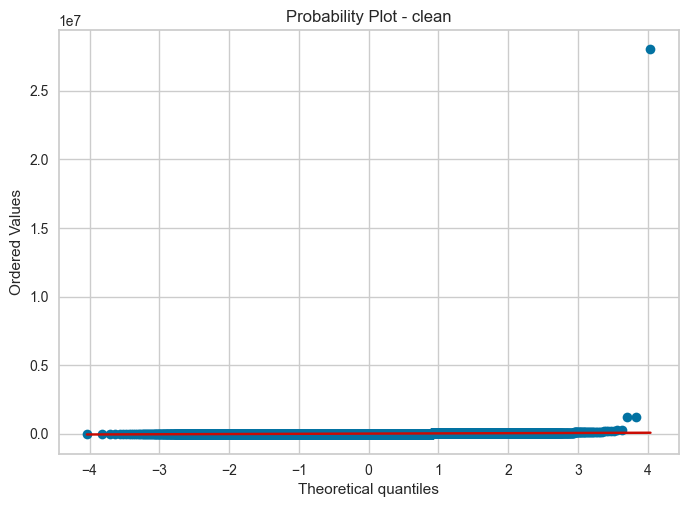

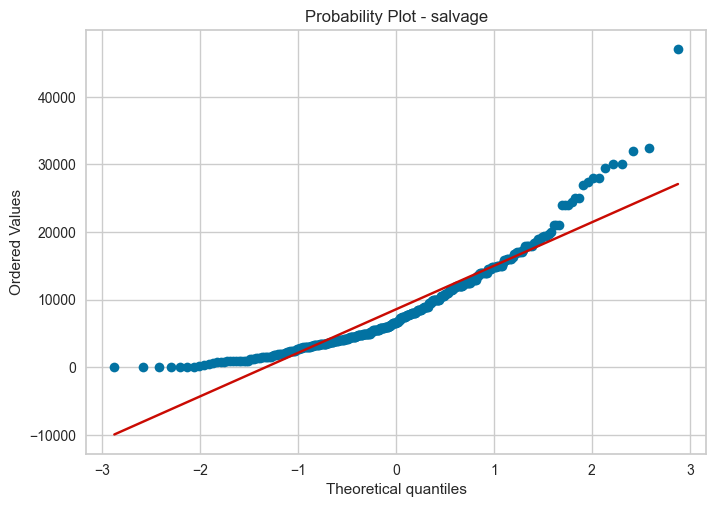

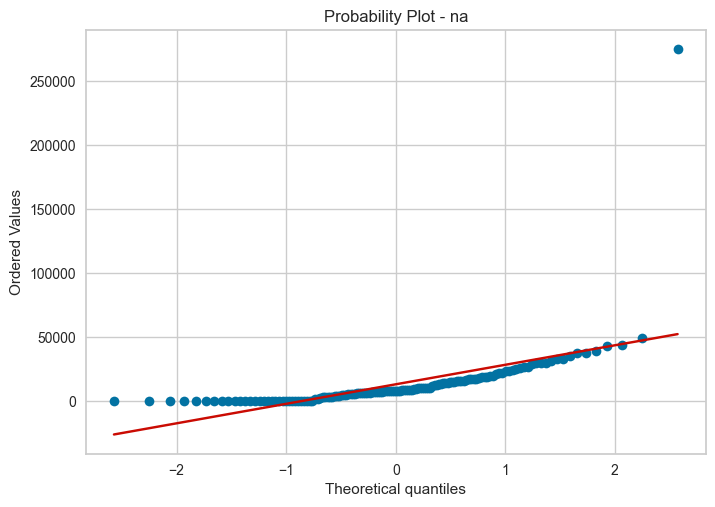

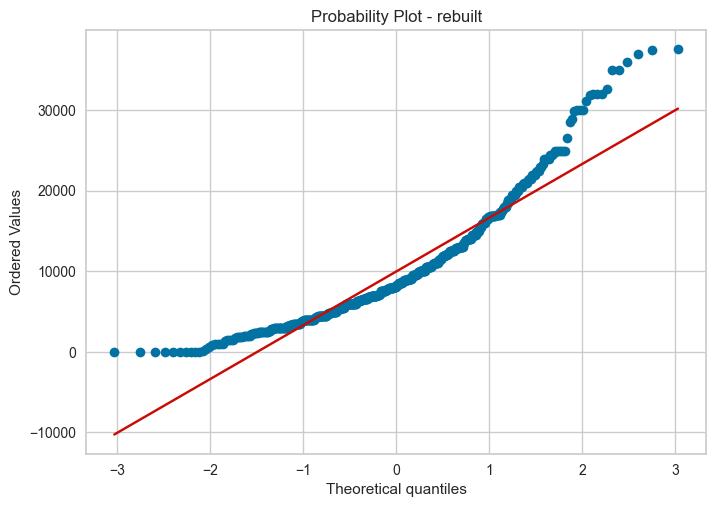

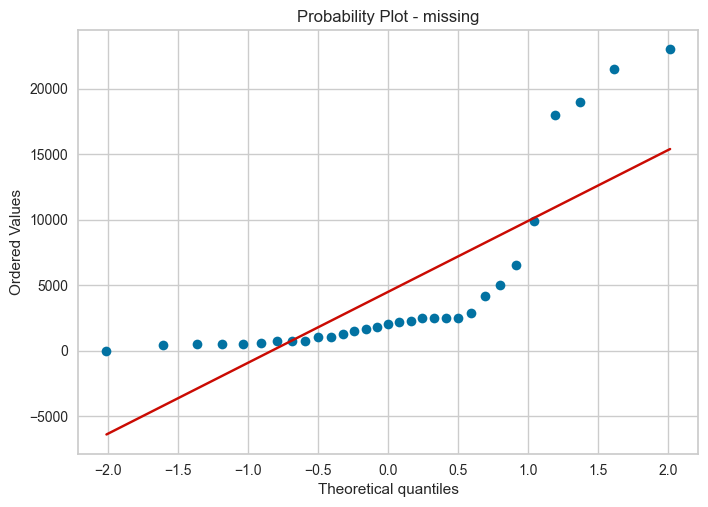

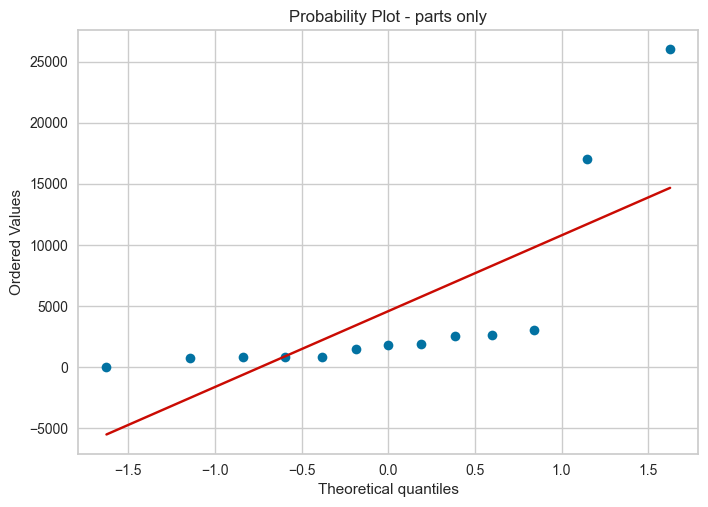

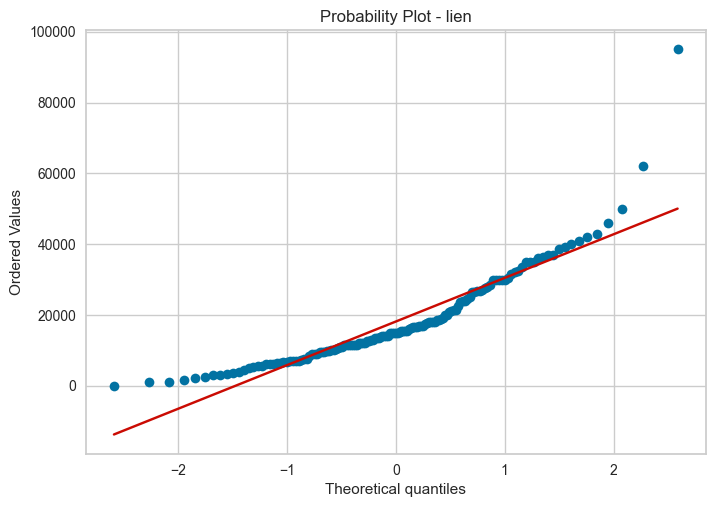

In [112]:
normality(car_df, 'title_status', 'price')

In [113]:
def anova_test(df, col_1, col_2, alpha = 0.05):
    df = df[[col_1,col_2]]
    data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
    anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
    anova_table.set_index('Source of Variation', inplace = True)

    # calculate SSTR and update anova table
    x_bar = df[col_1].mean()
    SSTR = df.groupby(col_2).count() * (df.groupby(col_2).mean() - x_bar)**2
    anova_table['SS']['Between Groups'] = SSTR[col_1].sum()

    # calculate SSE and update anova table
    SSE = (df.groupby(col_2).count() - 1) * df.groupby(col_2).std()**2
    anova_table['SS']['Within Groups'] = SSE[col_1].sum()

    # calculate SSTR and update anova table
    SSTR = SSTR[col_1].sum() + SSE[col_1].sum()
    anova_table['SS']['Total'] = SSTR

    # update degree of freedom
    anova_table['df']['Between Groups'] = df[col_2].nunique() - 1
    anova_table['df']['Within Groups'] = df.shape[0] - df[col_2].nunique()
    anova_table['df']['Total'] = df.shape[0] - 1

    # calculate MS
    anova_table['MS'] = anova_table['SS'] / anova_table['df']

    # calculate F 
    F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
    anova_table['F']['Between Groups'] = F

    # p-value
    anova_table['P-value']['Between Groups'] = 1 - (stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups']))*2

    # F critical 
    
   
    if anova_table['P-value']['Between Groups'] < alpha:
        return 'rejected, there are difference mean'
    else:
        return 'no differences'


In [114]:
#tranformation
def model_raw(x:str):
    list_model = x.split(' ')
    return list_model[0]

car_df['model'] = car_df['model'].apply(lambda x: model_raw(str(x)))

In [115]:
for col in car_df.columns:
    if car_df[col].dtype == 'O':
        car_df[col] = car_df[col].fillna('otros')
        car_df[col]= car_df[col].astype('str')
        
car_df['model_brand'] = car_df['model']+'-'+car_df['manufacturer']


In [116]:
cat_variables = [i for i in car_df.columns if car_df[i].dtype not in ['int64','float64']]
num_variable = list(set(car_df.columns.unique()).difference(set(cat_variables)))


In [117]:
cat_variables.pop(cat_variables.index('description'))
cat_variables

['manufacturer',
 'model',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'state',
 'odometer_cat',
 'model_brand']

### first check categorical variables agains catergorical

In [118]:
dic_chi_pvalue = {'cols':[], 'pvalue':[]}
support_list = [i for i in cat_variables]
for cols in cat_variables:
    for cols_other in support_list:
        print(cols, cols_other)
        if cols == cols_other or  cols =='model_brand' or cols_other == 'model_brand':
            pass
        else :
            dic_chi_pvalue['cols'].append(cols+'+'+cols_other)
            dic_chi_pvalue['pvalue'].append(chi_squared_test(car_df, cols, cols_other, alpha = 0.05))
    support_list.pop(support_list.index(cols))        

manufacturer manufacturer
manufacturer model


manufacturer cylinders
manufacturer fuel
manufacturer title_status
manufacturer transmission
manufacturer drive
manufacturer type
manufacturer state
manufacturer odometer_cat
manufacturer model_brand
model model
model cylinders
model fuel
model title_status
model transmission
model drive
model type
model state
model odometer_cat
model model_brand
cylinders cylinders
cylinders fuel
cylinders title_status
cylinders transmission
cylinders drive
cylinders type
cylinders state
cylinders odometer_cat
cylinders model_brand
fuel fuel
fuel title_status
fuel transmission
fuel drive
fuel type
fuel state
fuel odometer_cat
fuel model_brand
title_status title_status
title_status transmission
title_status drive
title_status type
title_status state
title_status odometer_cat
title_status model_brand
transmission transmission
transmission drive
transmission type
transmission state
transmission odometer_cat
transmission model_brand
drive drive
drive type
drive state
drive odometer_cat
drive model_brand
t

In [119]:
pd.DataFrame(dic_chi_pvalue).to_csv(r'C:\Users\super\OneDrive\Escritorio\klym_project\data\interim\cor_cat.csv', index=False)

In [120]:
dic_anova_pvalue = {'cols':[], 'pvalue':[]}
for cols in cat_variables:
    dic_anova_pvalue['cols'].append(cols)
    dic_anova_pvalue['pvalue'].append(anova_test(car_df, 'price', cols))

pd.DataFrame(dic_anova_pvalue)

cols                               pvalue
0   manufacturer                       no differences
1          model                       no differences
2      cylinders  rejected, there are difference mean
3           fuel  rejected, there are difference mean
4   title_status                       no differences
5   transmission                       no differences
6          drive  rejected, there are difference mean
7           type                       no differences
8          state                       no differences
9   odometer_cat  rejected, there are difference mean
10   model_brand                       no differences

#### apparently only odometer_cat is the only variable with with diferrent on mean by group

In [121]:
corr =car_df[num_variable].corr()
corr.to_csv(r'C:\Users\super\OneDrive\Escritorio\klym_project\data\interim\cor_num.csv')

#### there is no strong relacion with the variables i will elimnate all na´s and see what happends

In [122]:
car_df.columns

Index(['price', 'year', 'manufacturer', 'model', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'description', 'state', 'odometer_cat', '#crashes', 'poverty',
       'model_brand'],
      dtype='object')

In [123]:
car_df = car_df.drop(columns=['manufacturer', 'description', 'odometer'])

In [124]:
car_df.loc[car_df['state']=='ma','poverty'].iloc[0]

10.0

In [125]:
car_df.loc[car_df['state']=='dc','poverty']=car_df.loc[car_df['state']=='ma','poverty'].iloc[0]
car_df.loc[car_df['state']=='dc','#crashes']=car_df.loc[car_df['state']=='ma','#crashes'].iloc[0]



In [126]:
car_df['model_brand'] = car_df['model_brand'].str.replace('nan-','')

In [127]:
car_df = car_df.drop(columns=['model_brand', 'state', 'model'])

In [128]:
finals_df = car_df[~car_df.apply(lambda row: row.astype(str).str.contains('na')).any(axis=1)]


##### frist convertion of variables

In [129]:
finals_df.dtypes

price              int64
year             float64
cylinders         object
fuel              object
title_status      object
transmission      object
drive             object
type              object
odometer_cat    category
#crashes         float64
poverty          float64
dtype: object

In [130]:
cat_variables = [i for i in finals_df if finals_df[i].dtype == 'O' or i=='odometer_cat'] 


In [131]:
df_support = pd.get_dummies(finals_df,columns=cat_variables)

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
df_support['dummi_variable'] =1

In [134]:
x = df_support.drop(columns='price')
y = df_support[['price']]
model_selection = RandomForestRegressor()
model_selection.fit(x,y)

feature_importances = model_selection.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

print("Feature Importances:")
for i in sorted_indices:
    print(f"{x.columns[i]}: {feature_importances[i]}")

Feature Importances:
poverty: 0.19077170328263068
#crashes: 0.15300231507277753
year: 0.14583030511598327
drive_fwd: 0.14544877313763205
cylinders_6 cylinders: 0.07448042160113219
cylinders_4 cylinders: 0.045501143964943085
type_pickup: 0.03208301304723742
type_sedan: 0.02828170370063885
title_status_clean: 0.021436968351369375
title_status_rebuilt: 0.016852689604688796
transmission_manual: 0.01671456010610477
fuel_diesel: 0.013854448448082606
odometer_cat_no_data: 0.01268280081127535
type_otros: 0.011312508338256515
cylinders_otros: 0.011150041335497298
transmission_automatic: 0.010431400534985385
cylinders_8 cylinders: 0.006832207456189784
odometer_cat_0-30ml: 0.006692809174893281
type_truck: 0.005250452897901386
type_coupe: 0.004909051275166738
odometer_cat_31-60ml: 0.0046814016685607215
drive_rwd: 0.004261739500101291
odometer_cat_61-90ml: 0.004243550081375313
odometer_cat_91-120ml: 0.0036674974801765487
type_SUV: 0.0033639932104820402
drive_otros: 0.003217399884171123
odometer_cat

In [135]:
import seaborn as sns
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

Feature  Importance
2                      poverty    0.190772
1                     #crashes    0.153002
0                         year    0.145830
29                   drive_fwd    0.145449
8        cylinders_6 cylinders    0.074480
6        cylinders_4 cylinders    0.045501
41                 type_pickup    0.032083
42                  type_sedan    0.028282
18          title_status_clean    0.021437
22        title_status_rebuilt    0.016853
25         transmission_manual    0.016715
12                 fuel_diesel    0.013854
46        odometer_cat_no_data    0.012683
40                  type_otros    0.011313
11             cylinders_otros    0.011150
24      transmission_automatic    0.010431
9        cylinders_8 cylinders    0.006832
47         odometer_cat_0-30ml    0.006693
43                  type_truck    0.005250
35                  type_coupe    0.004909
48        odometer_cat_31-60ml    0.004681
31                   drive_rwd    0.004262
49        odometer_cat_61-90ml    0.004244
50       odometer_cat_91-120ml    0.003667
32                    type_SUV    0.003364
30                 drive_otros    0.003217
51  odometer_cat_121mil-150mil    0.002603
28                   drive_4wd    0.002594
26          transmission_other    0.001901
39                  type_other    0.001874
16                  fuel_other    0.001777
3       cylinders_10 cylinders    0.001743
52         odometer_cat_+151ml    0.001622
45                  type_wagon    0.001358
14                    fuel_gas    0.001336
34            type_convertible    0.001141
44                    type_van    0.000957
4       cylinders_12 cylinders    0.000651
10             cylinders_other    0.000510
36              type_hatchback    0.000449
13               fuel_electric    0.000382
37               type_mini-van    0.000372
15                 fuel_hybrid    0.000358
19           title_status_lien    0.000310
27          transmission_otros    0.000246
17                  fuel_otros    0.000244
23        title_status_salvage    0.000216
20        title_status_missing    0.000118
33                    type_bus    0.000108
38                type_offroad    0.000071
5        cylinders_3 cylinders    0.000055
7        cylinders_5 cylinders    0.000039
21     title_status_parts only    0.000011
53              dummi_variable    0.000000

In [136]:
importance_df[importance_df['Importance']<0.01]

Feature  Importance
9        cylinders_8 cylinders    0.006832
47         odometer_cat_0-30ml    0.006693
43                  type_truck    0.005250
35                  type_coupe    0.004909
48        odometer_cat_31-60ml    0.004681
31                   drive_rwd    0.004262
49        odometer_cat_61-90ml    0.004244
50       odometer_cat_91-120ml    0.003667
32                    type_SUV    0.003364
30                 drive_otros    0.003217
51  odometer_cat_121mil-150mil    0.002603
28                   drive_4wd    0.002594
26          transmission_other    0.001901
39                  type_other    0.001874
16                  fuel_other    0.001777
3       cylinders_10 cylinders    0.001743
52         odometer_cat_+151ml    0.001622
45                  type_wagon    0.001358
14                    fuel_gas    0.001336
34            type_convertible    0.001141
44                    type_van    0.000957
4       cylinders_12 cylinders    0.000651
10             cylinders_other    0.000510
36              type_hatchback    0.000449
13               fuel_electric    0.000382
37               type_mini-van    0.000372
15                 fuel_hybrid    0.000358
19           title_status_lien    0.000310
27          transmission_otros    0.000246
17                  fuel_otros    0.000244
23        title_status_salvage    0.000216
20        title_status_missing    0.000118
33                    type_bus    0.000108
38                type_offroad    0.000071
5        cylinders_3 cylinders    0.000055
7        cylinders_5 cylinders    0.000039
21     title_status_parts only    0.000011
53              dummi_variable    0.000000

##### all of the features are more important than a dummy variable

###### beside the normal metrics i want to build one taking on consideranting the definition of loss and the potencial loss if we sale expencier

In [137]:
def metric_evaluation(y_pred, y_test):
    loss_low_price = max(0,y_test-y_pred)
    loss_high_price = max(y_test-y_pred,0)*min(1,(y_test/y_pred)-1)
    tot_prof = loss_high_price+loss_low_price
    return tot_prof/y_test



In [138]:
for i in ['year', '#crashes', 'poverty']:
    df_support[i] =  (df_support[i]-df_support[i].mean())/df_support[i].std()

In [139]:
df_support = df_support.drop(columns=['dummi_variable'])


In [140]:
from pycaret.regression import *
s = setup(data= df_support, target = 'price', session_id=123)
best = compare_models()



In [141]:
best

HuberRegressor()

In [142]:
model = tune_model(best)

Initiated  . . . . . . . . . . . . . . . . . .                   11:41:43
Status     . . . . . . . . . . . . . . . . . .  Searching Hyperparameters
Estimator  . . . . . . . . . . . . . . . . . .            Huber Regressor

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [143]:
dic_valores = {'col':[],'media':[],'desviacion':[]}

for i in ['year', '#crashes', 'poverty']:
    dic_valores['col'].append(i)
    dic_valores['media'].append(car_df[i].mean())
    dic_valores['desviacion'].append(car_df[i].std())
    

df_valores = pd.DataFrame(dic_valores)
df_valores.to_csv(r'C:\Users\super\OneDrive\Escritorio\klym_project\data\external\valores_stant.csv', index=False)
   

In [ ]:
fill_df.to_csv(r'C:\Users\super\OneDrive\Escritorio\klym_project\data\external\valores.csv', index=False)

In [ ]:
dic = {'col':['hola'], 'val':[123], 'other':['dnjdjd']}
df_dic = pd.DataFrame(dic)
df_dic

col  val   other
0  hola  123  dnjdjd

In [ ]:
df_dic['col'].iloc[0]

'hola'

In [ ]:
import pickle

with open(r"C:\Users\super\OneDrive\Escritorio\klym_project\models\model.pkl", "rb") as f:
    model_p = pickle.load(f)

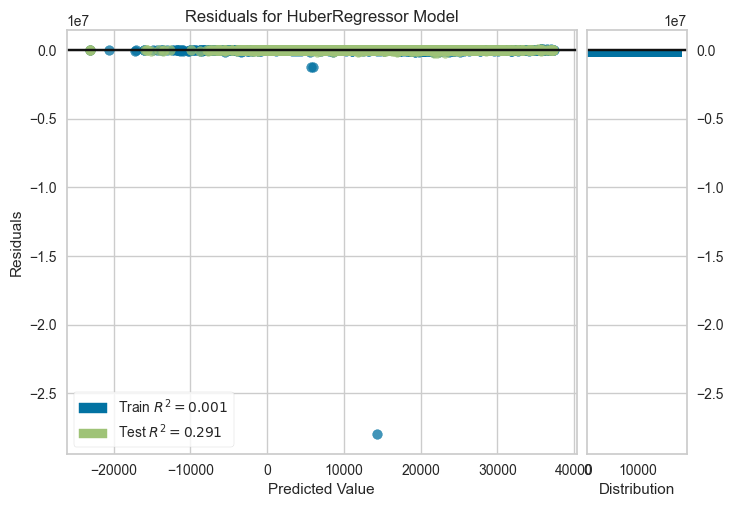

In [145]:
from pycaret.regression import *
plot_model(model_p)

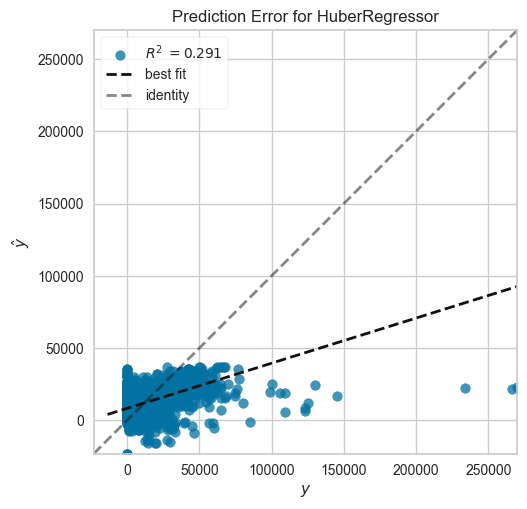

In [146]:
plot_model(model, plot = 'error')

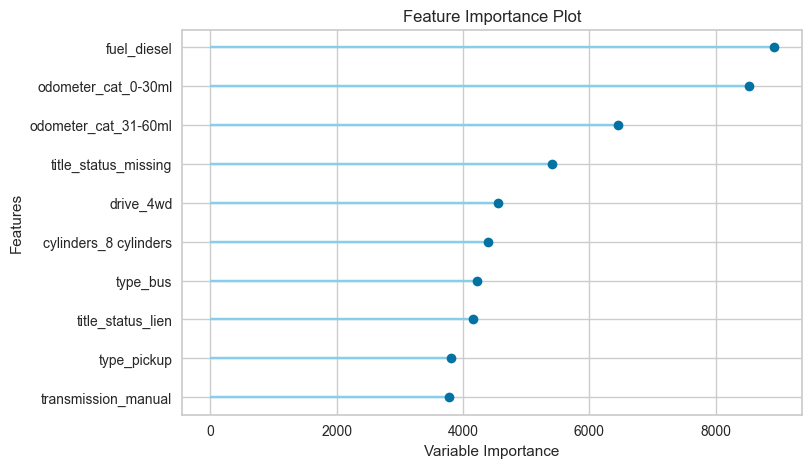

In [ ]:
plot_model(model, plot='feature')

In [ ]:
predict_model(model)

year  #crashes   poverty  cylinders_10 cylinders  \
4102  -0.555033 -0.081912  0.637512                   False   
1576  -0.329537 -0.530050 -0.195248                   False   
2389   0.008706 -0.294188  0.445336                   False   
20342  0.121454 -0.546897  0.573453                   False   
5462   0.910689 -0.530050 -0.195248                   False   
...         ...       ...       ...                     ...   
15315 -1.006025 -0.294188  0.445336                   False   
7778   0.685194 -0.546897  0.573453                   False   
19700 -0.555033 -0.530050 -0.195248                   False   
931    0.685194 -0.530050 -0.195248                   False   
3697   0.346950 -0.563745 -0.579599                   False   

       cylinders_12 cylinders  cylinders_3 cylinders  cylinders_4 cylinders  \
4102                    False                  False                   True   
1576                    False                  False                  False   
2389                    False                  False                  False   
20342                   False                  False                   True   
5462                    False                  False                  False   
...                       ...                    ...                    ...   
15315                   False                  False                  False   
7778                    False                  False                  False   
19700                   False                  False                  False   
931                     False                  False                  False   
3697                    False                  False                  False   

       cylinders_5 cylinders  cylinders_6 cylinders  cylinders_8 cylinders  \
4102                   False                  False                  False   
1576                   False                   True                  False   
2389                   False                  False                   True   
20342                  False                  False                  False   
5462                   False                  False                  False   
...                      ...                    ...                    ...   
15315                  False                   True                  False   
7778                   False                   True                  False   
19700                  False                  False                   True   
931                    False                   True                  False   
3697                   False                  False                   True   

       ...  type_wagon  odometer_cat_no_data  odometer_cat_0-30ml  \
4102   ...       False                 False                False   
1576   ...       False                 False                False   
2389   ...       False                 False                False   
20342  ...       False                 False                False   
5462   ...       False                 False                 True   
...    ...         ...                   ...                  ...   
15315  ...       False                 False                False   
7778   ...       False                 False                False   
19700  ...       False                 False                False   
931    ...       False                 False                False   
3697   ...       False                 False                 True   

       odometer_cat_31-60ml  odometer_cat_61-90ml  odometer_cat_91-120ml  \
4102                  False                 False                  False   
1576                  False                 False                  False   
2389                  False                  True                  False   
20342                 False                 False                  False   
5462                  False                 False                  False   
...                     ...                   ...                    ...   
15315  

In [ ]:
with open(r"C:\Users\super\OneDrive\Escritorio\klym_project\models\model.pkl", "rb") as f:
    model_p = pickle.load(f)

In [ ]:
set_df = set(['#crashes',
 'cylinders_10 cylinders',
 'cylinders_12 cylinders',
 'cylinders_3 cylinders',
 'cylinders_4 cylinders',
 'cylinders_5 cylinders',
 'cylinders_6 cylinders'])
set_model =set(model.feature_names_in_)

list(set_model.difference(set_df))

['fuel_other',
 'odometer_cat_91-120ml',
 'odometer_cat_+151ml',
 'type_mini-van',
 'type_pickup',
 'drive_fwd',
 'fuel_electric',
 'cylinders_other',
 'transmission_manual',
 'fuel_hybrid',
 'odometer_cat_61-90ml',
 'drive_4wd',
 'type_hatchback',
 'year',
 'title_status_missing',
 'transmission_otros',
 'title_status_parts only',
 'type_bus',
 'type_sedan',
 'odometer_cat_31-60ml',
 'poverty',
 'odometer_cat_0-30ml',
 'cylinders_otros',
 'type_wagon',
 'type_convertible',
 'fuel_diesel',
 'drive_rwd',
 'title_status_lien',
 'type_offroad',
 'cylinders_8 cylinders',
 'type_truck',
 'odometer_cat_no_data',
 'fuel_otros',
 'title_status_rebuilt',
 'transmission_other',
 'type_SUV',
 'title_status_clean',
 'title_status_salvage',
 'type_coupe',
 'odometer_cat_121mil-150mil',
 'type_otros',
 'transmission_automatic',
 'drive_otros',
 'fuel_gas',
 'type_other',
 'type_van']

In [ ]:
X=df_support.drop(columns='price')

In [ ]:
model_p.predict(X)

array([ 4096.28347591, 11000.34445191, 10059.92596938, ...,
        7324.17537285,  3867.13078241, 19819.70200226])

In [ ]:
def normalization(x, col):
    path = r'C:\Users\super\OneDrive\Escritorio\klym_project\\data\external\valores_stant.csv'
    df_vals = pd.read_csv(path)
    mean= df_vals.loc[df_vals['col']==col,'media'].iloc[0]
    std = df_vals.loc[df_vals['col']==col,'desviacion'].iloc[0]
    val = (x- mean)/std
    return val

path = r'C:\Users\super\OneDrive\Escritorio\klym_project\data\external\valores_stant.csv'
df_vals = pd.read_csv(path)

In [ ]:
df_vals.loc[df_vals['col']=='#crashes','media'].iloc[0]

273.1632267388002

In [ ]:
model.feature_names_in_

array(['year', '#crashes', 'poverty', 'cylinders_10 cylinders',
       'cylinders_12 cylinders', 'cylinders_3 cylinders',
       'cylinders_4 cylinders', 'cylinders_5 cylinders',
       'cylinders_6 cylinders', 'cylinders_8 cylinders',
       'cylinders_other', 'cylinders_otros', 'fuel_diesel',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'fuel_otros', 'title_status_clean', 'title_status_lien',
       'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage',
       'transmission_automatic', 'transmission_manual',
       'transmission_other', 'transmission_otros', 'drive_4wd',
       'drive_fwd', 'drive_otros', 'drive_rwd', 'type_SUV', 'type_bus',
       'type_convertible', 'type_coupe', 'type_hatchback',
       'type_mini-van', 'type_offroad', 'type_other', 'type_otros',
       'type_pickup', 'type_sedan', 'type_truck', 'type_van',
       'type_wagon', 'odometer_cat_no_data', 'odometer_cat_0-30ml',
       'odome

In [ ]:
def model_raw(x:str):
    list_model = x.split(' ')
    return list_model[0]

def path_all():
    return os.getcwd()

def handle_nas(df,model=None, brand= None, col_fill=None):
    if col_fill in ['manufacturer', 'model']:
        return 'otros'
    elif col_fill in ['type', 'cylinders', 'drive', 'size']:
        cond = (df['model']==model) & (df['manufacturer']==brand)
        if df.loc[cond,col_fill].shape[0]==0:
            return 'otros'
        else:
            var = df.loc[cond,col_fill].iloc[0]
            return var

def normalization(x, col):
    path = path_all()
    path = r'C:\Users\super\OneDrive\Escritorio\klym_project\data\external\valores_stant.csv'
    df_vals = pd.read_csv(path)
    mean= df_vals.loc[df_vals['col']==col,'media'].iloc[0]
    std = df_vals.loc[df_vals['col']==col,'desviacion'].iloc[0]
    val = (x- mean)/std
    return val


def odometer(x):
    if x <0:
        return 'no_data'
    elif x >=0 and x<= 30000: 
        return '0-30ml'
    elif x>30000 and x <= 60000:
        return '31-60ml'
    elif x > 60000 and x <= 90000:
        return '61-90ml'
    elif x > 90000 and x <= 120000:
        return '91-120ml' 
    elif x > 120000 and x <= 150000:
        return '121mil-150mil'
    else: 
        return'+151ml'

In [ ]:
data = {
    "type": ["sedan"],
    "year": [2018],
    'fuel':['gas'],
    "model": ["camry"],
    'transmission':['manual'],
    "manufacturer": ["toyota"],
    "drive": ["AWD"],
    "odometer": [65800],
    'title_status':['clean'],
    'poverty':[12.4],
    'crashes':[2345],
    'cylinders':['6 cylinders']
}




df = pd.DataFrame(data)
        
for i in df.columns:
    if pd.isna(df[i].loc[0])==True:
        if i in ['model', 'manufacturer']:
            df[i] = handle_nas(df, col_fill=i)
        else:
            model = df['model'].iloc[0]
            brand = df['manufacturer'].iloc[0]
            df[i] = handle_nas(df, model=model, brand=brand, col_fill=i) 

df['odometer_cat'] = odometer(df['odometer'].iloc[0])

df = df.rename(columns={'crashes':'#crashes'})

for i in ['year', 'poverty', '#crashes']:
    df[i] = normalization(df[i].iloc[0], i)
    
df = pd.get_dummies(df,columns= ['cylinders', 'transmission', 'title_status', 'odometer_cat', 'type'])   
df = df.drop(columns=['manufacturer', 'model'])


        

with open(r"C:\Users\super\OneDrive\Escritorio\klym_project\models\model.pkl", "rb") as f:
    model_pred = pickle.load(f)

set_df = set(df.columns.tolist())
set_mol = set(model_pred.feature_names_in_)

cols_add = list(set_df.difference(set_mol))

dic_change_cols ={}
for i in range(len(cols_add)):
    col_n = cols_add[i].split('_')[0]
    col_n = col_n+'_otros'
    dic_change_cols[cols_add[i]]=col_n
    
df = df.rename(columns=dic_change_cols)

cols_missing = list(set_mol.difference(set_df))

for col  in cols_missing:
    df[col] = False

df = df[list(model_pred.feature_names_in_)]

prediction = model_pred.predict(df)


In [ ]:
prediction[0]

12607.39700968258

In [ ]:
set_df = set(df.columns.tolist())
set_mol = set(model.feature_names_in_)
cols_add = list(set_df.difference(set_mol))

dic_change_cols ={}
for i in range(len(cols_add)):
    col_n = cols_add[i].split('_')[0]
    col_n = col_n+'_otros'
    dic_change_cols[cols_add[i]]=col_n
    
df = df.rename(columns=dic_change_cols)

cols_missing = list(set_mol.difference(set_df))




In [ ]:

for col  in cols_missing:
    df[col] = False

In [ ]:
dic_change_cols ={}
for i in range(len(cols_add)):
    col_n = cols_add[i].split('_')[0]
    col_n = col_n+'_otros'
    dic_change_cols[cols_add[i]]=col_n
    
dic_change_cols

{'manufacturer_otros': 'manufacturer_otros',
 'drive_otros': 'drive_otros',
 'model_otros': 'model_otros',
 'price_otros': 'price_otros'}

In [ ]:
cols_add

['manufacturer_toyota', 'drive_AWD', 'model', 'price']

In [ ]:
df = df.drop(columns=['price', 'model'])

In [ ]:
df = df[list(model.feature_names_in_)]

In [ ]:
model.predict(df)

array([12256.63380369])